In [55]:
# !pip install -q git+https://github.com/seankmartin/simuran.git@main
# !pip install -q allensdk==2.14.1
# !pip install -q one-api==1.17.0
# !pip install -q ibllib==2.19.0

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
from trna.common import load_config, regions_to_string, compute_distance, compute_variance, scale_data
from trna.allen import load_allen
from trna.gpfa import analyse_single_recording
from pathlib import Path
from simuran.plot.figure import SimuranFigure

In [58]:
# TODO try with different binsize = 0.02 and try as well
config_path = r"E:\Repos\task-related-neural-activity\config\config.yaml"
config = load_config(config_path=config_path)

In [59]:
rc, loader = load_allen(
    config["allen_data_dir"], config["allen_manifest"], ["CA1", "SUB", "TH"]
)
recording = rc.load(0)

In [60]:
info = analyse_single_recording(
    recording,
    config["gpfa_params"],
    Path("test_gpfa"),
    config["allen_data_dir"],
    ["CA1", "SUB", "TH"],
    filter_prop=config["allen_filter_properties"],
)

Analysing recording: visual-behavior-neuropixels-0.4.0--behavior_ecephys_sessions--1047969464--ecephys_session_1047969464
Initializing parameters using factor analysis...

Fitting GPFA model...


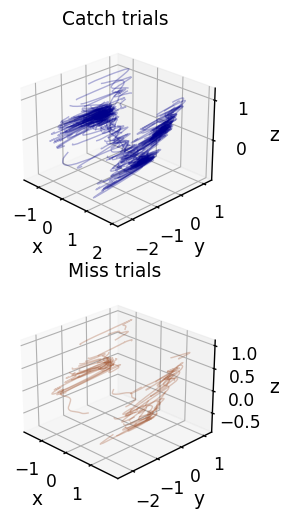

In [61]:
from trna.plot import simple_trajectory_plot, plot_gpfa_distance, plot_all_trajectories, plot_trajectories_split

fig = simple_trajectory_plot(info["correct"], info["incorrect"])
fig = SimuranFigure(fig, Path("test_gpfa") /"gpfa")
fig.save()

fig = plot_all_trajectories(info["correct"], info["incorrect"], num=2000)
fig = SimuranFigure(fig, Path("test_gpfa") /"gpfa_all")
fig.save()

fig = plot_trajectories_split(info["correct"], info["incorrect"], num=2000)
fig = SimuranFigure(fig, Path("test_gpfa") /"gpfa_split")
fig.save()

regions_str = regions_to_string(["CA1", "SUB", "TH"])
plot_gpfa_distance([info], Path("test_gpfa"), regions_str, "allen") 

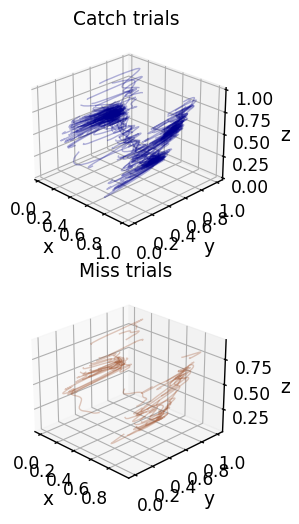

In [62]:
scaled_correct, scaled_incorrect = scale_data(info["correct"], info["incorrect"])
fig = simple_trajectory_plot(scaled_correct, scaled_incorrect)
fig = SimuranFigure(fig, Path("test_gpfa") /"gpfa_scaled")
fig.save()

fig = plot_trajectories_split(scaled_correct, scaled_incorrect, num=2000)
fig = SimuranFigure(fig, Path("test_gpfa") /"gpfa_split_scaled")
fig.save()

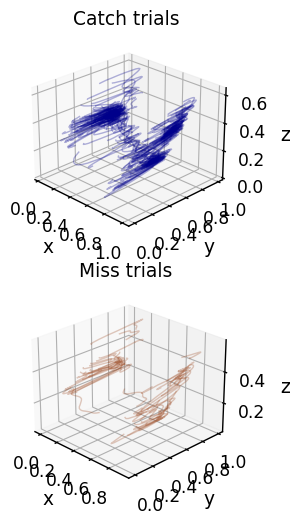

In [63]:
uniform_scaled_correct, uniform_scaled_incorrect = scale_data(info["correct"], info["incorrect"], uniform=True)
fig = simple_trajectory_plot(uniform_scaled_correct, uniform_scaled_incorrect)
fig = SimuranFigure(fig, Path("test_gpfa") /"gpfa_uniform_scaled")
fig.save()

fig = plot_trajectories_split(uniform_scaled_correct, uniform_scaled_incorrect, num=2000)
fig = SimuranFigure(fig, Path("test_gpfa") /"gpfa_split_uniform_scaled")
fig.save()

In [64]:
import numpy as np
# Of course I could ADD this to the overall spreadsheet instead of removing old distances
actual_distance = compute_distance(info["correct"], info["incorrect"])
actual_variance = compute_variance(info["correct"], info["incorrect"])
print("Actual distance: ", actual_distance)
print(np.mean(actual_variance[0][0]))
print(np.mean(actual_variance[0][1]))
print(np.mean(actual_variance[0][2]))
scaled_distance = compute_distance(scaled_correct, scaled_incorrect)
scaled_variance = compute_variance(scaled_correct, scaled_incorrect)
print("Scaled distance: ", scaled_distance)
print(np.mean(scaled_variance[0][0]))
print(np.mean(scaled_variance[0][1]))
print(np.mean(scaled_variance[0][2]))


Actual distance:  (0.1623230387245139, 0.21187671536851307)


IndexError: invalid index to scalar variable.